<center><img src="images/ML_video_w_s.webp" style="margin: 20 auto;"></center>
<p style="font-family: Protomolecule; font-size: 2.3em; line-height: 90%; margin: 0 auto; text-align: center; width: 100%;"><span style="letter-spacing: .1rem;">Machine</span><br><span style="letter-spacing: -.1rem;">Learning</span></p>
<p class="author" style="font-family: Protomolecule; margin: 0px auto;  text-align: center; width: 100%; font-size: 1.2em;">Joern Ploennigs</p>
<p class="subtitle" style="font-family: Protomolecule; font-size: larger; margin: 1em auto; text-align: center; width: 100%; font-size: 1.2em;">Clustern</p>

# Clustern

![](images/midjourney_cluster_of_buildings.png)
> A city, far from being a cluster of buildings, is actually a sequence of spaces enclosed and defined by buildings.
> 
> — Ieoh Ming Pei

Die wichtigste Aufgabe im Unsupervised Learning ist das Cluster. _Clustern_ ist eine Technik des maschinellen Lernens, die verwendet wird, um Datenpunkte in Gruppen (Cluster) mit ähnlichen Merkmalen zu gruppieren. Clustering kann für verschiedene Aufgaben verwendet werden, z. B. für die Kundensegmentierung, die Betrugserkennung und die Bildverarbeitung.

Es gibt unterschiedliche Typen von Clustering-Verfahren, die je nach Zielsetzung und Eigenschaften der Daten geeignet sind. Wir werden konkreten Verfahren von einige davon im Folgenden näher betrachten:

- _Partitionierende Verfahren_ teilen die Daten in eine feste Anzahl von Clustern und versuchen, die Varianz innerhalb der Cluster zu minimieren.
- _Hierarchische Verfahren_ bauen eine Clusterhierarchie auf und sind flexibler, benötigen jedoch mehr Berechnungsressourcen.
- _Dichtebasierte Verfahren_ identifizieren Cluster basierend auf der Dichte der Datenpunkte und sind besonders gut für Daten mit Rauschen und Clustern unregelmäßiger Form geeignet.
- _Gitterbasierte Verfahren_ teilen den Datenraum in eine endliche Anzahl von Zellen (Gitter) und führen das Clustering auf diesen Zellen durch.
- _Graphbasierte Verfahren_ nutzen Graphstrukturen, um die Ähnlichkeiten zwischen den Datenpunkten darzustellen und das Clustering durchzuführen.

## <a href="/lec_slides/13_Clustering.slides.html">Folien</a>
<iframe src="/lec_slides/13_Clustering.slides.html" width="750" height="500"></iframe>

## Partitionierende Clustering - $k$-means

### Methode

$k$-Means ist ein weit verbreiteter Algorithmus zur partiellen Gruppierung von Datenpunkten in eine vordefinierte Anzahl $k$ von Clustern aufzuteilen. Der Algorithmus ist zum sehr beliebt, weil er einfach zu verstehen ist und auch bei großen Datensätzen sehr schnell rechnet.

Der Algorithmus versucht die Summe der quadratischen Abstände zwischen den Datenpunkten und ihren jeweiligen Clusterzentren zu minimieren:

$$
J = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

Dabei geht der Algorithmus wie folgt vor:

1. _Initialisierung_: Wähle $k$ Initialwerte für die Clusterzentren (meist zufällig).

2. _Zuordnung_: Weise jeden Datenpunkt $ x_i $ dem nächstgelegenen Clusterzentrum $ \mu_j $ zu:

    $$
    C_j = \{ x_i : \| x_i - \mu_j \|^2 \leq \| x_i - \mu_z \|^2 \quad \forall z, 1 \leq z \leq k \}
    $$

3. _Aktualisierung_: Berechne die neuen Clusterzentren als Mittelwert der zugewiesenen Punkte:

    $$
    \mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
    $$

4. _Wiederholung_: Wiederhole die Schritte 2 und 3, bis die Clusterzentren konvergieren (d.h., sie ändern sich nicht mehr signifikant).

$k$-Means eignet sich am besten für Cluster mit sphärischer Form. In anderen Fällen kann die Qualität der Cluster suboptimal sein. Durch die zufällige Initialisierung können die Ergebnisse von $k$-Means von der Wahl der initialen Clusterzentren abhängen, weshalb es sich lohnt $k$-Means ggf. mehrmals auszuführen und gute Clusterzentren zu speichern.

### Einfaches Beispiel

Clustering wird am besten in einem 2-D-Rahmen verstanden, in dem wir die Daten und Cluster leicht visualisieren können. Das haben wir schon bei der Klassifikation mit dem Yin-Yang Datensatz gemacht. Der eignet sich für das Clustering nicht, da beide Klassen nicht klar getrennt sind und somit durch Clustering nicht zu identifizieren wären.

Deshalb erzeugen wir uns zuerst ein einfaches Beispiel mit 5 Clustern. Als ersten Schritt erstellen wir zufällig die entsprechenden Clusterzentren $x_{1c}$ und $x_{2c}$ aus einer Normalverteilung mit einer Standardabweichung (`scale`) von 5.

In [2]:
import numpy as np # Import von NumPy
import pandas as pd # Import von Pandas
import plotly.express as px # Import von Plotly
px.set_mapbox_access_token(open(".mapbox_token").read())

nc = 5  # number of clusters
np.random.seed(1)  # make the results replicable
## create cluster centers
x1c = np.random.normal(scale=5, size=nc)
x2c = np.random.normal(scale=5, size=nc)

Als nächstes erstellen wir 100 Datenpunkte. Wir weisen jedem Datenpunkt einem Cluster zu und platzieren ihn dann in einer zufälligen Position in der Nähe des entsprechenden Clusterzentrums. Die Cluster könnten sinnvolle IDs haben, aber hier weisen wir ihnen einfach ein numerisches Label $0, 1, \dots, 4$ zu.

In [3]:
n = 100  # number of data points
cl = np.random.choice(nc, n)  # cluster membership label for each dot
## create clusters around centers
x1 = x1c[cl] + np.random.normal(size=n)
x2 = x2c[cl] + np.random.normal(size=n)
df = pd.DataFrame({"x1":x1, "x2":x2, "cluster":cl})

Die Variable `cl` ist die ID (numerisches Label) des entsprechenden Clusters, die zufällig mit `np.random.choice` ausgewählt wird. Beachten Sie, wie die Punkte $(x, y)$ in der Nähe des entsprechenden Clusterzentrums $(x_{1c}, x_{2c})$ platziert sind, während zusätzliches normales Rauschen hinzugefügt wird. Allerdings hat diese Zeitskala ihren Standardwert, d.h. die Standardabweichung des Rauschens beträgt 1. Daher sind die Datenpunkte im Vergleich zu den Zentren selbst viel weniger um das Clusterzentrum herum verteilt.

Es gibt fünf verschiedene Cluster, die hier je nach entsprechender Cluster-ID unterschiedlich eingefärbt sind. Der vertikale und horizontale Maßstab ist gleich, damit das menschliche Auge die Entfernung richtig einschätzen kann, die wir unten verwenden.

In [4]:
fig=px.scatter(df, x="x1", y="x2", color="cluster", opacity=0.5, width=600, height=600)
fig.update_coloraxes(showscale=False)
fig.show()

Die Verwendung von unüberwachten Methoden in _sklearn_ ist in vielerlei Hinsicht ähnlich wie die Verwendung von überwachten Methoden, mit der Ausnahme, dass das Anpassen des Modells ohne das Ziel _y_ erfolgen muss. Wir importieren `KMeans` aus `sklearn.cluster` wie gewohnt. Danach richten wir das Modell ein, indem wir einfach `KMeans()` aufrufen. Das wichtigste Argument, das erwartet wird, ist die Anzahl der Cluster $k$. Es gibt auch andere Optionen in Bezug auf die Iterationen (`max_iter`), den genauen Algorithmus (`algorithm`). Als nächstes erstellen wir die Designmatrix $\bar{X}$, die wir unten für die Anpassung benötigen. Danach passen wir das Modell mit `fit` an, beachten Sie, dass wir für das unüberwachte Modell nur die Designmatrix `X` und keine Zielvariable `y` angeben (es ist ja einen unsupervised Model):

In [5]:
from sklearn.cluster import KMeans

X = df[['x1','x2']]

m = KMeans(n_clusters=5)
m.fit(X)

KMeans(n_clusters=5)

Dies erstellt das angepasste Modell, das wir in den nächsten Schritten zur Vorhersage von Cluster-Labels mit `predict()` verwenden können.

In [6]:
df['pred'] = m.predict(X)  # predicted cluster membership for each dot
df['pred'].head()

0    3
1    2
2    4
3    4
4    1
Name: pred, dtype: int32

Die Methode `predict` berechnet das vorhergesagte _Cluster-Label_ für jede Beobachtung (in `X`), wobei der mögliche Label-Bereich von $0$ bis $k-1$ reicht. Die identifizierte _Cluster-Zentren_ können mit dem Attribut `cluster_centers_` abgefragt werden:

In [7]:
hatc = m.cluster_centers_  # centroids for each cluster
print("centers:\n", hatc)

centers:
 [[ -5.41322852   1.54188806]
 [  8.0292849  -11.62947644]
 [  4.20444648  -1.50785831]
 [ -2.64264202  -3.99768911]
 [ -3.11293253   8.42900307]]


Dies gibt $k$ (hier 5) Vektoren zurück (als Zeilen der Matrix). Jeder Vektor entspricht den Schwerpunkten (Centroid) der entsprechenden Cluster, in der gleichen Reihenfolge wie die Labels. Die erste Zeile der Matrix ist also der Schwerpunkt für Cluster "0". Da die Daten hier 2-dimensional sind, enthalten die Schwerpunkte zwei Komponenten.

Es ist ziemlich einfach, die Ergebnisse von $k$-means zu visualisieren:

In [8]:
fig = px.scatter(df, x="x1", y="x2", color="pred", opacity=0.5, width=600, height=600)
fig.add_scatter(x=hatc[:,0], y=hatc[:,1], mode="markers", marker = dict(symbol = 'circle-open-dot', size=20), name="center")
fig.update_coloraxes(showscale=False)
fig.show()

### Wahl der Anzahl der Cluster $k$

Die Herausforderung bei $k$-Means-Clustering ist den Parameter $k$ gut zu wählen. Hierbei möchte man zum einen sicherstellen, dass die Cluster gut separiert sind, aber auch nicht so groß, dass zu viele kaum separierte Untercluster entstehen. Visualisieren wir einmal die Ergebnisse für 3 und 10 Cluster.

In [9]:
m = KMeans(n_clusters=3).fit(X)
hatc2 = m.cluster_centers_
df['pred2'] = m.predict(X)

fig = px.scatter(df, x="x1", y="x2", color="pred2", opacity=0.5, width=600, height=600)
fig.add_scatter(x=hatc2[:,0], y=hatc2[:,1], mode="markers", marker = dict(symbol = 'circle-open-dot', size=20), name="center")
fig.update_coloraxes(showscale=False)
fig.show()

In [10]:
m = KMeans(n_clusters=10).fit(X)
hatc2 = m.cluster_centers_
df['pred2'] = m.predict(X)

fig = px.scatter(df, x="x1", y="x2", color="pred2", opacity=0.5, width=600, height=600)
fig.add_scatter(x=hatc2[:,0], y=hatc2[:,1], mode="markers", marker = dict(symbol = 'circle-open-dot', size=20), name="center")
fig.update_coloraxes(showscale=False)
fig.show()

Um ein geeignetes $k$ zu identifizieren kann man so genannte _Ellbogen-Diagramme_ erzeugen, indem man einfach mehrere Cluster mit unterschiedlichen $k$-Werten trainiert und den quadratischen Fehler (`inertia_`). Wenn man diese Fehler als Linien-Diagramm darstellt ergibt sich eine abfallende Funktion, die einem Ellbogen ähnlich ist. Die besten $k$-Werte liegen dort wo die Kurve abflacht. In diesem Beispiel nicht überraschend bei 5.

In [11]:
k_range = range(2, 10) # Clusteranzahl
loss = [KMeans(k).fit(X).inertia_ for k in k_range]

px.line(x=k_range, y=loss)

Das Attribut `inertia_` des angepassten Modells enthält den entsprechenden Verlustfunktionswert.
Hier passen wir $k$-Means-Modelle für $k = 2, 3, \dots, 9$ an, speichern den jeweiligen Verlust und plotten ihn.

Wir können sehen, dass der Verlust schnell auf fast null fällt bei $k=5$. Daher ist $k=5$ die optimale Anzahl von Clustern in diesen Daten. Dies kann tatsächlich visuell auf den obigen Bildern bestätigt werden.

### Beispiel Baustellen

Prüfen wir den Ansatz auf einem echten Datensatz, der Liste an Baustellen in Rostock. Wir wollen die Baustellen nach ihrem Ort clustern, also nach der Latitude und Longitude.

In [12]:
baust  = pd.read_csv("../data/Baustellen/baustellen_flat.csv")
baust = baust.dropna(subset=["latitude", "longitude","sparte"])
baust.head(3)

latitude  longitude                                  uuid kreis_name  \
0  54.089282  12.111994  063a229c-db25-45af-9fba-8d963b287910    Rostock   
1  54.068210  12.078264  07165e95-4e5f-429c-88b6-125d261cbcda    Rostock   
2  54.174303  12.081928  077f9448-c35e-4074-8491-7d142045a8db    Rostock   

   kreis_schluessel                   gemeindeverband_name  \
0           13003.0  Rostock, Hanse- und Universitätsstadt   
1           13003.0  Rostock, Hanse- und Universitätsstadt   
2           13003.0  Rostock, Hanse- und Universitätsstadt   

   gemeindeverband_schluessel                          gemeinde_name  \
0                 130030000.0  Rostock, Hanse- und Universitätsstadt   
1                 130030000.0  Rostock, Hanse- und Universitätsstadt   
2                 130030000.0  Rostock, Hanse- und Universitätsstadt   

   gemeinde_schluessel     strasse_name strasse_schluessel            sparte  \
0         1.300300e+11  Budapester Str.              01640  Fernwärmeleitung   
1         1.300300e+11     Satower Str.              08180        Grünpflege   
2         1.300300e+11         Am Markt              00460     Wasserleitung   

  von nach                  baubeginn                    bauende  \
0  21  NaN  2024-03-04 07:00:00+01:00  2024-04-12 17:00:00+02:00   
1  56   65  2024-03-07 07:00:00+01:00  2024-03-31 15:00:00+02:00   
2   6  NaN  2024-03-06 07:00:00+01:00  2024-03-28 18:00:00+01:00   

                         verkehrsbeeintraechtigungen  \
0  Sicherungsmaßnahmen entlang der Straße, Verkeh...   
1  halbseitige Sperrung, Sicherungsmaßnahmen entl...   
2  Sicherungsmaßnahmen entlang der Straße, Sicher...   

                    baumassnahme      dauer  
0  FW-Leitung i.a. der Hanseatic  39.375000  
1                  Baumpflanzung  24.291667  
2     Einbau Trinkwasserschieber  22.458333

Bilden wir als erstes die Designmatrix und visualisieren das Ellbogendiagramm, um eine geeignete Anzahl an Clustern zu identifizieren.

In [13]:
Xb = baust[['latitude','longitude']]
k_range = range(2, 30) # Clusteranzahl
loss = [KMeans(k).fit(Xb).inertia_ for k in k_range]

px.line(x=k_range, y=loss)

Das ist ein typisches, echtes Ellbogendiagramm, wo das beste $k$ nicht klar erkennbar ist. Allerdings ist der Anstieg für Werte unter 10 noch zu hoch, um nützlich zu sein. Ab 15 flacht die Kurve so ab, dass man hier eine Grenze setzen kann.

In [14]:
Xb = baust[['latitude','longitude']]
mb = KMeans(n_clusters=15)
mb.fit(Xb)

KMeans(n_clusters=15)

In [15]:
baust['pred'] = mb.predict(Xb) # identifizierte cluster
hatcb = mb.cluster_centers_  # centroids for each cluster

In [16]:
fig = px.scatter_mapbox(baust, lat="latitude", lon="longitude", color="pred", hover_name="sparte", zoom=9, width=600, height=600)
fig.add_scattermapbox(lat=hatcb[:,0], lon=hatcb[:,1], mode="markers", name="center")
fig.update_coloraxes(showscale=False).show()

## Hierarchisches Clustering

Hierarchisches Clustern ist eine Methode zur Gruppierung von Datenpunkten, die eine hierarchische Struktur von Clustern erstellt. Es gibt zwei Hauptansätze: agglomerative (bottom-up) und divisive (top-down) Methoden.

### Agglomeratives Hierarchisches

Agglomeratives Hierarchisches Clustering beginnt mit jedem Datenpunkt als eigenständigem Cluster und fusioniert iterativ die nächsten Paare von Clustern, bis nur noch ein Cluster übrigbleibt. Dabei sind die Schritte des agglomerativen Clustering:

1. _Initialisierung_: Initialisiere $n$ Cluster, wobei jeder Cluster einen Datenpunkt enthält.

2. _Entfernungsmessung_: Berechne die Distanz zwischen allen Paaren von Clustern unter Nutzung einer der untenstehenden Abstandsmaße.

4. _Fusionierung_: Identifiziere die zwei nächsten Cluster unter Nutzung einer der untenstehenden Fusionierungsstrategien. Fasse diese beiden Cluster zu einem neuen Cluster zusammen. Aktualisiere die Distanzen zwischen den Clustern.

5. _Wiederholung_: Wiederhole Schritt 2 und 3, bis nur noch die gewünschte Anzahl von Clustern übrig ist.

Hierbei werden unterschiedliche _Abstandsmaße_ verwendet:
- **Jaccard**: Die Jaccard-Distanz wird hauptsächlich für binäre oder kategorische Daten (Text) verwendet. Sie misst die Ähnlichkeit zwischen endlichen Mengen und ist besonders nützlich, wenn es um die Anwesenheit oder Abwesenheit von Merkmalen geht.

$$
L_J = \left(\sum_{k=1}^p (x_{ik}-x_{jk})^r\right)^{1/r}
$$

- **Euklidisch**: Die Euklidische Distanz ist das am häufigsten verwendete Maß für den Abstand zwischen zwei Punkten in einem $n$-dimensionalen Raum. Sie ist besonders nützlich, wenn die Datenpunkte metrisch sind.

$$
L_E = \sqrt{\sum_{k=1}^p (x_{ik}-x_{jk})^2}
$$

- **Pearson**: Die Pearson-Korrelation misst die lineare Korrelation zwischen zwei Variablen und liegt zwischen -1 und 1. Sie ist besonders nützlich, wenn die Beziehung zwischen Variablen linear ist.

$$
L_P=\sqrt{\sum_{k=1}^p \frac{(x_{ik}-x_{jk})^2}{s_k^2}}
$$

- **Manhattan**: Die Manhattan-Distanz, auch City Block Distanz genannt, summiert die absoluten Unterschiede der Koordinaten zweier Punkte. Sie ist besonders nützlich, wenn die Daten eine natürliche Gitterstruktur haben.

$$
L_M=\sum_{k=1}^p |x_{ik}-x_{jk}|
$$

und unterschiedliche Fusionierungsstrategien benutzt
- **Single Linkage** misst die minimale Distanz zwischen Punkten in zwei Clustern. Es neigt dazu, längliche und "chainged" Cluster zu erstellen.

$$
D_\text{sl}(A,B):=\min_{a\in A, b\in B}\{d(a,b)\}
$$

- **Complete Linkage** misst die maximale Distanz zwischen Punkten in zwei Clustern. Es erzeugt kompakte und sphärische Cluster.

$$
D_\text{cl}(A,B):=\max_{a\in A, b\in B}\{d(a,b)\}
$$

- **Average Linkage** misst die durchschnittliche Distanz zwischen Punkten in zwei Clustern. Es balanciert zwischen den Extremen von Single und Complete Linkage und ist nützlich, wenn Cluster ähnliche Varianz haben.

$$
D_\text{al}(A,B):=\tfrac{1}{|A||B|}\sum_{a\in A, b\in B} d(a,b)
$$

- **Centroid-Linkage** misst die Distanz zwischen den Schwerpunkten (Centroide) der Cluster. Es ist nützlich, wenn der Schwerpunkt eines Clusters von Interesse ist. Es kann aber auch zu Problemen führen, wenn Schwerpunkte sich in leere Räume bewegen (Inversionsproblem).

$$
D_\text{cd}(A,B):=d(\bar a, \bar b)
$$

- **Ward's Method** minimiert die Varianz innerhalb der Cluster. Es ist eine der besten Methoden und fördert die Bildung von kompakten, kugelförmigen Clustern.

$$
D_\text{wd}(A,B):=\frac{d(\bar a, \bar b)^2}{1/|A|+1/|B|}
$$

Die Verwendung der Modelle ist wie gehabt.

In [17]:
from sklearn.cluster import AgglomerativeClustering 

mAHC = AgglomerativeClustering(n_clusters = 5)
df["predAHC"] = mAHC.fit_predict(X)

Es gibt jedoch einen deutlichen Unterschied: Das Modell `AgglomerativeClustering` hat _keine_ Methode `.predict`. Man sollte stattdessen `.fit_predict` verwenden, da dies sowohl das Anpassen als auch das Vorhersagen in einem Schritt durchführt.

In [18]:
fig=px.scatter(df, x="x1", y="x2", color="predAHC", opacity=0.5, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

Basierend auf diesen Daten sind die hierarchischen Cluster genau die gleichen wie beim $k$-means (nur ihre Labels können sich unterscheiden). Das liegt daran, dass die Daten so sauber in verschiedene Cluster aufgeteilt sind, und daher alle Clustering-Algorithmen die gleiche Struktur erkennen werden.

Allerdings ermöglicht hierarchisches Clustering die Anzeige von Dendrogrammen. Dies ist eine Baum-Darstellung des Hierarchischen Cluster. Das wichtige dabei ist, dass die  Höhe der Äste zwischen Knoten die Distanz beider Cluster anzeigt. Je länger der Ast, desto größer ist die Distanz zwischen den vereinigten Clustern. Dadurch lassen sich auch gut die passende Anzahl $n$ an Clustern schätzen.

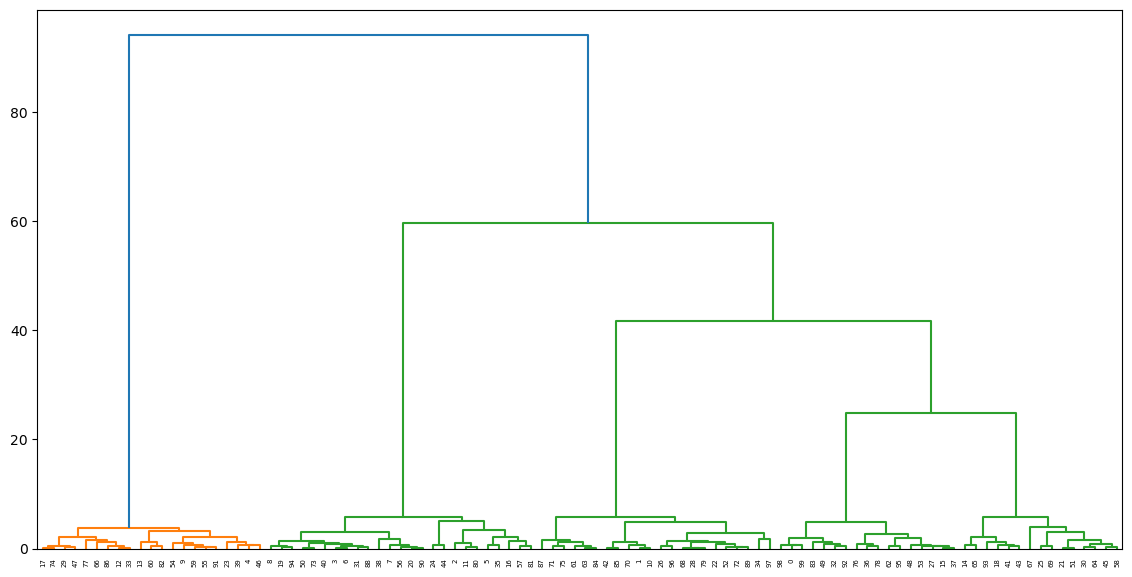

In [19]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(14, 7))
dendrogram = sch.dendrogram((sch.linkage(X, method='ward')))

Versuchen wir den Clusteringansatz auf dem Baustellendatensatz:

In [20]:
mbAHC = AgglomerativeClustering(n_clusters = 15)
baust["predAHC"] = mbAHC.fit_predict(Xb)

In [21]:
mAHC = AgglomerativeClustering(n_clusters = 5)
df["predAHC"] = mAHC.fit_predict(X)

fig = px.scatter_mapbox(baust, lat="latitude", lon="longitude", color="predAHC", hover_name="sparte", zoom=9, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

In [22]:
fig = px.scatter(baust, x="latitude", y="longitude", color="predAHC", width=600, height=600)
fig.update_coloraxes(showscale=False).show()

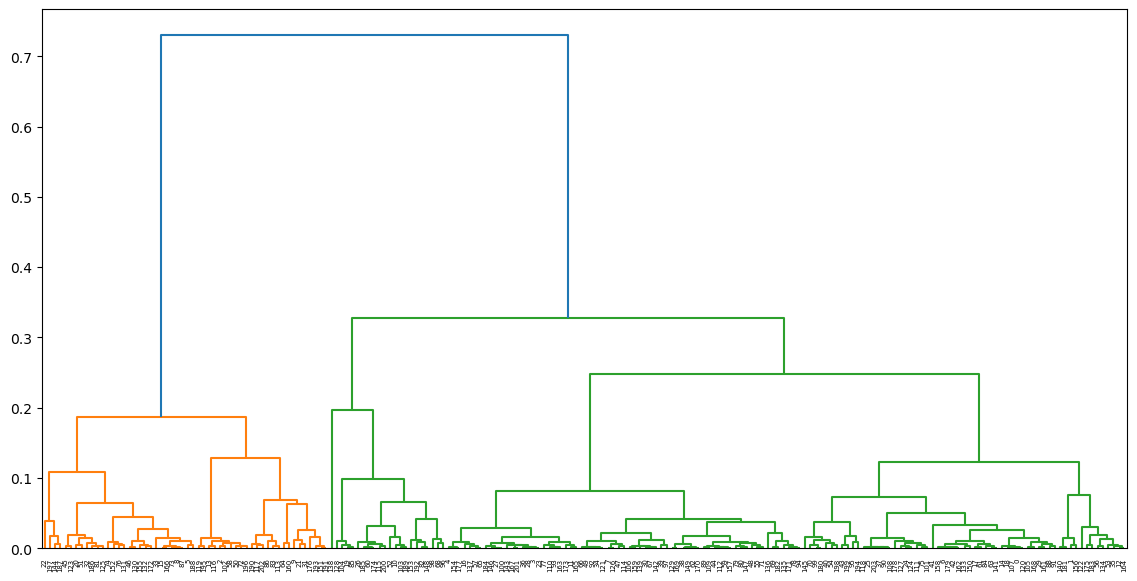

In [23]:
plt.figure(figsize=(14, 7))
dendrogram = sch.dendrogram((sch.linkage(Xb, method='ward')))
plt.show()

### Divisives Clustering

Der Algorithmus für divisives Clustering kann wie folgt beschrieben werden:

1. **Initialisierung**: Initialisiere einen einzelnen Cluster, der alle Datenpunkte enthält.

2. **Evaluierung**: Bewerte, ob der aktuelle Cluster weiter aufgeteilt werden soll. Dies kann z. B. durch ein statistisches Kriterium erfolgen, z. B. anhand der Intra-Cluster-Varianz.

3. **Aufspaltung**:   Wenn eine Aufspaltung erforderlich ist, teile den Cluster in zwei neue Cluster. Die Aufteilung kann z. B. durch eine K-Means-Initialisierung erfolgen.

4. **Wiederholung**:  Wiederhole Schritt 2 und 3, bis die gewünschte Anzahl von Clustern erreicht ist.

Das Problem des Ansatzes ist, dass Divisive Verfahren eine Heuristik brauchen, nach denen die Datensätze gespalten werden, wo meist gleiche Verfahren wie beim agglomerativen Clustering genutzt werden, was zu gleichen Ergebnissen führt und einfacher ist. Deshalb findet der Ansatz wenig Anwendung in der Praxis und ist in `sklearn` auch nicht implementiert, weshalb er hier nicht weiter betrachtet wird.

### Dichtebasiertes Clustering

#### DBSCAN - Density-Based Spatial Clustering of Applications with Noise

DBSCAN ist ein Algorithmus für das dichtebasierte räumliche Clustering, der Datenpunkte in Cluster gruppiert, basierend auf ihrer Dichte im Raum. Im Gegensatz zu anderen Clustering-Algorithmen, bei denen die Anzahl der Cluster im Voraus festgelegt werden muss, kann DBSCAN automatisch die Anzahl und Form der Cluster in den Daten erkennen.

DBSCAN basiert auf der Einteilung des Datensatzes in Kernpunkte, Randpunkte und Rauschen. _Kernpunkte_ bilden die zentralen Punkte der Cluster. Es sind Datenpunkte $x_i$ mit einer hohen Dichte und mit mindestens $\text{MinPts}$ Nachbarn in einem Radius $\epsilon$. Diese Nachbarn werden als _Randpunkte_ bezeichnet und gehören zu den Clustern der Kernpunkte, sofern sie nicht selbst Kernpunkte sind. Alle anderen Datenpunkte haben eine geringe Dichte und werden als _Rauschen_ bezeichnet.

Der Algorithmus durchläuft die Datenpunkte und identifiziert die Kernpunkte und Randpunkte wie folgt:

1. Initialisierung: Markiere alle Datenpunkte als nicht klassifiziert.
2. Distanzberechnung: Berechne die Distanz zwischen allen Punkten (z.B. Euklidisch).
3. Für jeden unbesuchten Punkt $ x_i $:
   
    a. Markiere $ x_i $ als besucht.
   
    b. Bestimme alle Nachbarn im Radius $\epsilon$ via $ N_\epsilon(x_i) =\{x_i \in X | d(x_i,x_j) \leq \epsilon\} $.
   
    c. Wenn $ |N_\epsilon(x_i)| < \text{MinPts} $: Markiere $ p $ als Rauschen.
   
    d. Sonst:  Erstelle einen neuen Cluster $ C_{x_i} $ und füge $ x_i $ als Kernpunkt hinzu. Erweitere den Cluster um alle Nachbarn $x_j$ in $ N_\epsilon(x_i) $ als Randpunkte, wenn sie selbst keien Kernpunkte sind.

Die Anwendung von DBSCAN auf unseren Testdatensatz läuft bekanntermaßen. Hier kann man die Klassen-Labels an dem Attribut `labels_` auslesen.

In [24]:
from sklearn.cluster import DBSCAN

mDB = DBSCAN(eps=3, min_samples=2).fit(X)

df['predDBS'] = mDB.labels_
fig = px.scatter(df, x="x1", y="x2", color="predDBS", opacity=0.5, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

Der Ansatz erkennt alle fünf Cluster gut, was nicht überrascht, da es gute Dichteunterschiede gibt. Beim Baustellendatensatz sehen wir allerdings Unterschiede. Wo die anderen Clusteransätze die Baustelle in Graal-Müritz als Ausreißer in einem separaten Cluster gepackt haben (und damit unsere Clusteranzahl reduzieren), landet diese bei DBSCAN im Cluster -1, wird also als Rauschen exkludiert. Der Ansatz ist somit weniger anfällig für solche Ausreißer.

In [25]:
mbDB = DBSCAN(eps=0.01, min_samples=4).fit(Xb)

baust['predAHC'] = mbDB.labels_
fig = px.scatter_mapbox(baust, lat="latitude", lon="longitude", color="predAHC", hover_name="sparte", zoom=9, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

#### OPTICS - Ordering Points To Identify the Clustering Structure

Obwohl man bei DBSCAN keine Clusteranzahl angeben muss, ist die Wahl von $\epsilon$ und $\text{minPts}$ entscheidend für die Qualität der Cluster und häufig schwierig, da sie unintuitiver sind als die Clusteranzahl $k$. Dies versucht der OPTICS Algorithmus zu verbessern, in dem verschieden dichte Cluster erkannt werden indem eine hierarchische Darstellung (Erreichbarkeitsdiagramm/Reachability Plot) der Clusterstruktur erzeugt wird. Dadurch können Cluster auf verschiedenen Granularitätsebenen extrahiert werden.

In [26]:
from sklearn.cluster import OPTICS

mOPT = OPTICS().fit(X)
df['predOPT'] = mOPT.labels_
fig = px.scatter(df, x="x1", y="x2", color="predDBS", opacity=0.5, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

OPTICS sortiert intern die Cluster in ihrer Dichte, bzw. der Distanz in der Dichte. Das kann in Form eines _Erreichbarkeitsdiagramm_ (_Reachability Plot_) dargestellt werden, welche sich ähnlich wie Dendrogramme gut eignen die Trennbarkeit von Datensätzen zu untersuchen. In dem Plot werden Cluster als Täler repräsentiert. Ein tiefes _Tal_ bedeutet, dass die Punkte in diesem Bereich eng beieinander liegen, was auf eine höhere Dichte hinweist. _Spitzen_ zwischen den Tälern deuten auf die Trennung zwischen Clustern hin. Hohe Spitzen bedeuten, dass es einen größeren Abstand gibt, um von einem Cluster zum nächsten zu gelangen, was auf eine geringe Dichte oder Rauschen hinweist. Punkte, die isoliert sind, können als Rauschen betrachtet werden.

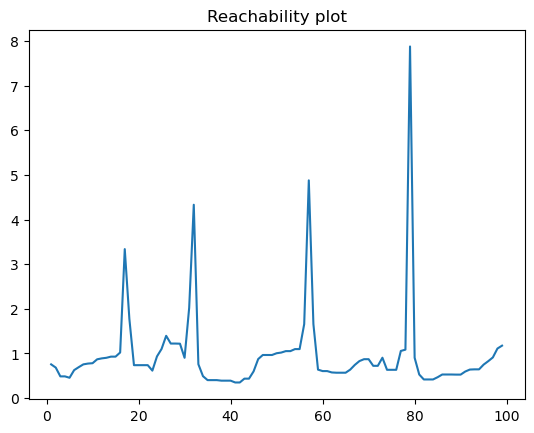

In [27]:
# Generate reachability plot
reachability = mOPT.reachability_[mOPT.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

Hier erkennt man gut die fünf Cluster, die gut separiert sind.

Beim Baustellendatensatz ergeben sich andere Cluster als bei DBSCAN. Die Behandlung von Ausreißern, wie die Baustelle in Graal-Müritz ist jedoch gleich.

In [28]:
mbOPT = OPTICS().fit(Xb)

baust['predOPT'] = mbOPT.labels_

fig = px.scatter_mapbox(baust, lat="latitude", lon="longitude", color="predOPT", hover_name="sparte", zoom=9, width=600, height=600)
fig.update_coloraxes(showscale=False).show()

Das Erreichbarkeitsdiagramm ist in diesem Fall auch wesentlich uneindeutiger, was auf eine schlechte Trennbarkeit der Cluster hindeutet.

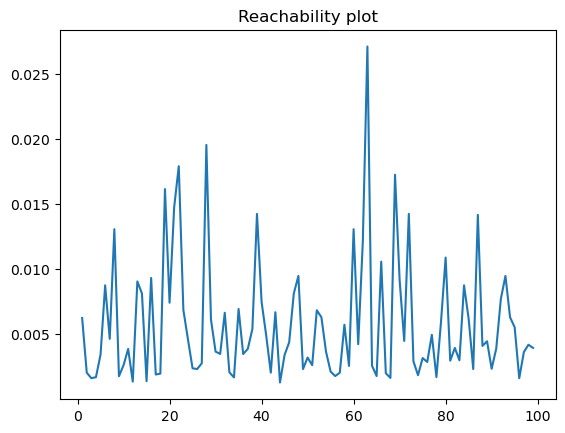

In [29]:
# Generate reachability plot
reachability = mbOPT.reachability_[mOPT.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

<div id="tsparticles_question" style="width: 100%; height:5em; background-color: white;">
    <div class="questions" style="letter-spacing: 0.03em; font-family: Protomolecule; font-size: 2.3em; position: absolute; top: 50%; left: 50%; transform: translate(-50%, -50%); color: black; z-index: 5;">f&nbsp;&nbsp;r&nbsp;&nbsp;a&nbsp;&nbsp;g&nbsp;&nbsp;e&nbsp;&nbsp;n&nbsp;&nbsp;?</div>
</div>